In [84]:
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

In [85]:
os.chdir(r"C:\Users\benja\VT_P_index\model")

In [86]:
gdf=gpd.read_file(r"results\base\base.shp")

In [87]:
gdf['total p in']=np.round(gdf['total p in'])

In [88]:
gdf['total p in']

0       45.0
1       40.0
2       58.0
3       10.0
4       38.0
        ... 
9665    40.0
9666    81.0
9667    50.0
9668    40.0
9669    82.0
Name: total p in, Length: 9670, dtype: float64

In [89]:
waters=gpd.read_file(r"Source_data\VT_Subwatershed_Boundaries_-_HUC12-shp\VT_Subwatershed_Boundaries_-_HUC12.shp")

In [90]:
waters.to_crs(gdf.crs, inplace=True)

In [91]:
waters[waters['Name'].str.contains('Little Otter')]

,OBJECTID,TNMID,LoadDate,GNIS_ID,AreaAcres,AreaSqKm,States,HUC12,Name,HUType,HUMod,ToHUC,NonContrib,NonContr_1,ShapeSTAre,ShapeSTLen,geometry
305,306,{AC4AD519-80E6-4BBD-8A93-F012C6F5FC18},2013-01-18,None,17530,70.941456,VT,041504080402,Little Otter Creek,S,TF,041504080602,0.0,0.0,7.094366e+07,55747.599892,"POLYGON ((438345.147 193950.389, 438349.278 19..."
338,339,{CFA48423-AE30-40DE-8FE1-E19DCCBCCAD9},2013-01-18,None,29065,117.621986,VT,041504080401,Headwaters Little Otter Creek,S,TF,041504080402,0.0,0.0,1.176234e+08,74302.204232,"POLYGON ((454767.538 182983.760, 454770.377 18..."


In [92]:
counties=gpd.read_file(r"Source_data\VT_Data_-_County_Boundaries-shp\VT_Data_-_County_Boundaries.shp")
addi=counties[counties['CNTYNAME'].str.contains('ADD')]

In [93]:
subset=waters[waters['Name'].str.contains('Little Otter')]
subset['null']=0
subset=subset.dissolve(by='null')
inset=gpd.GeoDataFrame(geometry=subset.geometry.envelope)

C:\Users\benja\Anaconda3\envs\pIndex\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
p_indicies=gdf['total p in']

In [95]:
rivers=gpd.read_file(r"C:\Users\benja\VT_P_index\model\Source_data\NHD_H_Vermont_State_Shape\Shape\NHDArea.shp")

lake=gpd.read_file(r"C:\Users\benja\VT_P_index\model\Source_data\NHD_H_Vermont_State_Shape\Shape\NHDWaterbody.shp")

road_line=gpd.read_file(r"C:\Users\benja\OneDrive\Desktop\VT_Road_Centerline-shp\VT_Road_Centerline.shp")

In [96]:
for gDF in [rivers, lake, road_line]:
    gDF.to_crs(gdf.crs, inplace=True)
    
inset_data=gpd.clip(gdf, inset)
road_sub=gpd.clip(road_line, inset)
roads_addi=gpd.clip(road_line, addi)
rivers_addi=gpd.clip(rivers, addi)
rivers_inset=gpd.clip(rivers, inset)


lake_addi=gpd.clip(lake, addi)
lake_inset=gpd.clip(lake, inset)

C:\Users\benja\Anaconda3\envs\pIndex\lib\site-packages\geopandas\geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()
C:\Users\benja\Anaconda3\envs\pIndex\lib\site-packages\geopandas\geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty

In [97]:
bins=[25, 50, 75, 100]

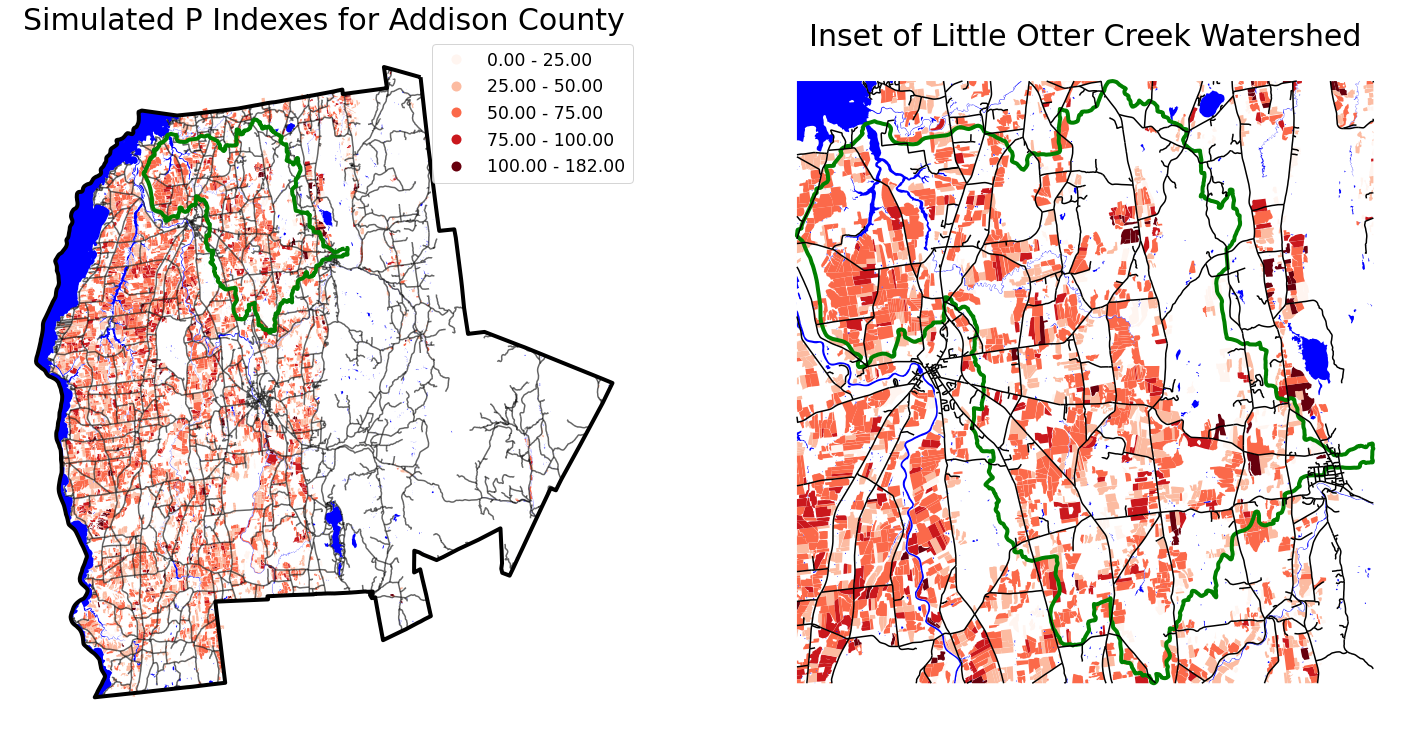

In [98]:
fig, axs = plt.subplots(figsize=(25,25), ncols=2)
ax=axs[0]
gdf.plot('total p in', cmap=mpl.cm.Reds, scheme="User_Defined", 
         ax=ax, legend=True, legend_kwds={'fontsize':'xx-large'},
        classification_kwds={'bins':bins})
addi.boundary.plot(ax=ax, linewidth=4, color='k')
roads_addi.plot(ax=ax, color='k', alpha=.6)
rivers_addi.plot(ax=ax, color='b')
lake_addi.plot(ax=ax, color='b')

ax.set_title('Simulated P Indexes for Addison County', size=30)
ax.axis('off')
subset.boundary.plot(ax=ax, linewidth=4, color='g')


ax=axs[1]
inset_data.plot('total p in', cmap=mpl.cm.Reds, 
        scheme="User_Defined", ax=ax, 
        legend_kwds={'fontsize':'xx-large'},
        classification_kwds={'bins':bins})

subset.boundary.plot(ax=ax, linewidth=4, color='g')
road_sub.plot(ax=ax, color='k', alpha=1)
rivers_inset.plot(ax=ax, color='b')
lake_inset.plot(ax=ax, color='b')
ax.axis('off')
ax.set_title('Inset of Little Otter Creek Watershed', size=30)
plt.savefig(r"C:\Users\benja\VT_P_index\model\misc_charts\sample_map.png")

In [99]:
df=gdf.drop(columns='geometry')
df.columns

Index(['IDNUM', 'CROP_COVER', 'RKLS', 'slope', 'LS', 'HUC12', 'distance_t',
       'elevation', 'soil_is_cl', 'hydro_grou', 'Rotation', 'K_factor',
       'county', 'crop_type', 'Years_Corn', 'Years_Hay', 'Years_Othe',
       'Years_Fall', 'acres', 'buffer_wid', 'erodedSoil', 'manure_par',
       'surface pa', 'dis_soilP', 'dis_manure', 'fertilizer', 'surface di',
       'subsurface', 'total_erod', 'non_adjust', 'total p in', 'total p lo',
       'erosion_ra', 'adj_p_lost', 'hydro_int'],
      dtype='object')

In [100]:
df.columns

Index(['IDNUM', 'CROP_COVER', 'RKLS', 'slope', 'LS', 'HUC12', 'distance_t',
       'elevation', 'soil_is_cl', 'hydro_grou', 'Rotation', 'K_factor',
       'county', 'crop_type', 'Years_Corn', 'Years_Hay', 'Years_Othe',
       'Years_Fall', 'acres', 'buffer_wid', 'erodedSoil', 'manure_par',
       'surface pa', 'dis_soilP', 'dis_manure', 'fertilizer', 'surface di',
       'subsurface', 'total_erod', 'non_adjust', 'total p in', 'total p lo',
       'erosion_ra', 'adj_p_lost', 'hydro_int'],
      dtype='object')

In [101]:
make_bins

<function __main__.make_bins(data, n_bins)>

In [102]:
def percent_hist(data, n_bins, ax=None, **plotkws):
    bins=make_bins(data, n_bins)
    length=len(data)
    data_to_plot=[np.where(((high>data) & (data>low)), 1, 0).sum()/length for low, high in zip(bins[:-1], bins[1:])]
    x=[np.mean([low, high]) for low, high in zip(bins[:-1], bins[1:])]
    width=max(bins)/n_bins
    if not ax:
        ax=plt.bar(x=x, height=data_to_plot, width=width, **plotkws)
    else:
        ax.bar(x=x, height=data_to_plot, width=width, **plotkws)
    return ax
    
def make_bins(data, n_bins):
    return [data.max()*(i/n_bins) for i in range(0, n_bins+1)]

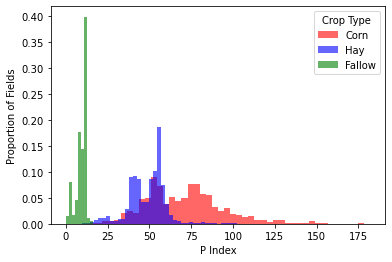

In [103]:
def hist_by_crop(gdf, column, x_label, save_path):
    fig, ax=plt.subplots()
    crops=['Corn', 'Hay', 'Fallow']
    colors=['r', 'b', 'g']
    for crop, color, n_bins in zip(crops,colors, [50, 50, 10]):

        ax=percent_hist(gdf[gdf['crop_type']==crop][column], n_bins, color=color, ax=ax, alpha=.6)

    ax.legend(labels=crops, title='Crop Type')
    ax.set_xlabel(x_label)
    ax.set_ylabel('Proportion of Fields')
    plt.savefig(save_path)
    
hist_by_crop(gdf, 'total p in', 'P Index', r"C:\Users\benja\VT_P_index\model\misc_charts\hist.png")

In [104]:
gdf2=gpd.read_file(r"C:\Users\benja\VT_P_index\model\results\bmps\bmps.shp")

In [105]:
inset_data2=gpd.clip(gdf2, inset)

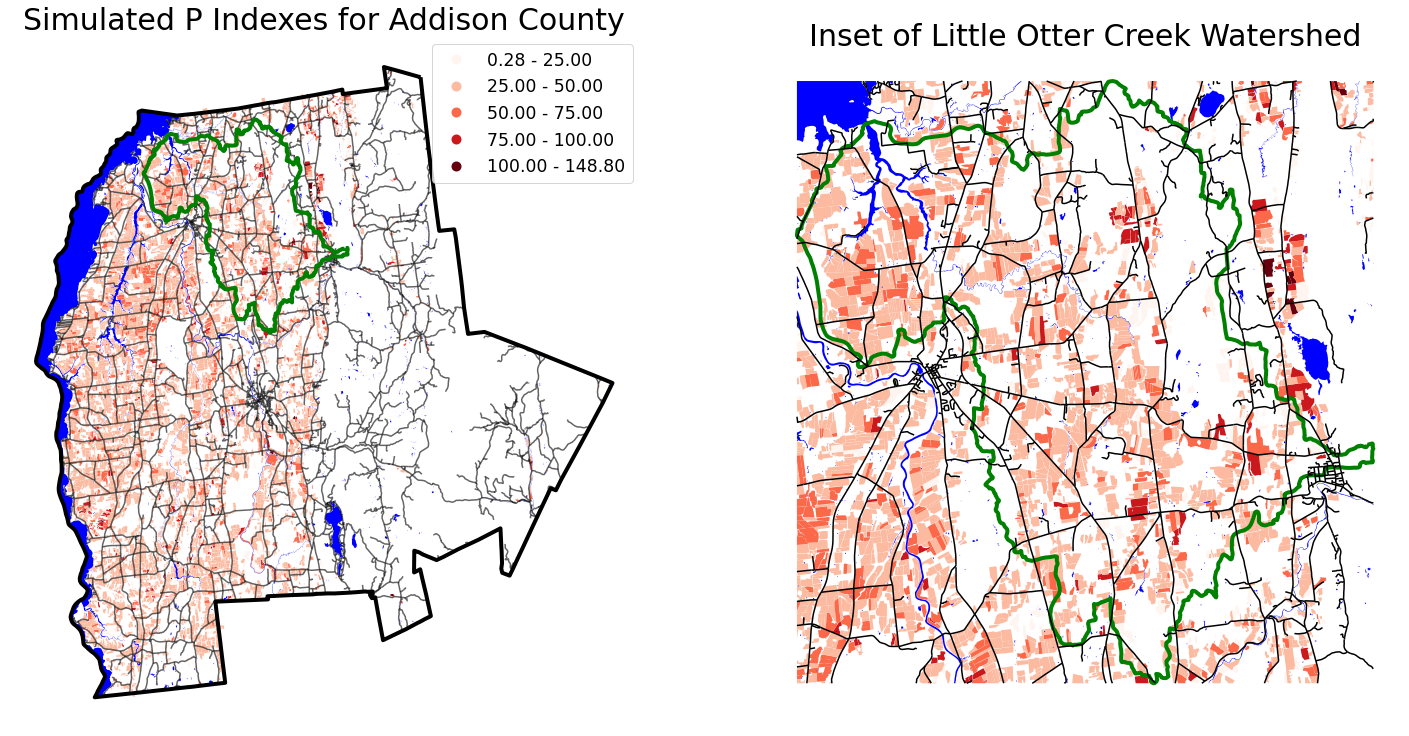

In [106]:
fig, axs = plt.subplots(figsize=(25,25), ncols=2)
ax=axs[0]
gdf2.plot('total p in', cmap=mpl.cm.Reds, scheme="User_Defined", 
         ax=ax, legend=True, legend_kwds={'fontsize':'xx-large'},
        classification_kwds={'bins':bins})
addi.boundary.plot(ax=ax, linewidth=4, color='k')
roads_addi.plot(ax=ax, color='k', alpha=.6)
rivers_addi.plot(ax=ax, color='b')
lake_addi.plot(ax=ax, color='b')

ax.set_title('Simulated P Indexes for Addison County', size=30)
ax.axis('off')
subset.boundary.plot(ax=ax, linewidth=4, color='g')


ax=axs[1]
inset_data2.plot('total p in', cmap=mpl.cm.Reds, 
        scheme="User_Defined", ax=ax, 
        legend_kwds={'fontsize':'xx-large'},
        classification_kwds={'bins':bins})

subset.boundary.plot(ax=ax, linewidth=4, color='g')
road_sub.plot(ax=ax, color='k', alpha=1)
rivers_inset.plot(ax=ax, color='b')
lake_inset.plot(ax=ax, color='b')
ax.axis('off')
ax.set_title('Inset of Little Otter Creek Watershed', size=30)
plt.savefig(r"C:\Users\benja\VT_P_index\model\misc_charts\sample_map_bmps.png")

In [107]:
gdf['difference']=gdf['total p in']-gdf2['total p in']

In [108]:
gdf['difference']

0       12.048050
1        9.159532
2       12.296370
3       -0.710085
4        5.850493
          ...    
9665     2.887506
9666     8.180377
9667     3.582127
9668     2.611816
9669    11.286641
Name: difference, Length: 9670, dtype: float64

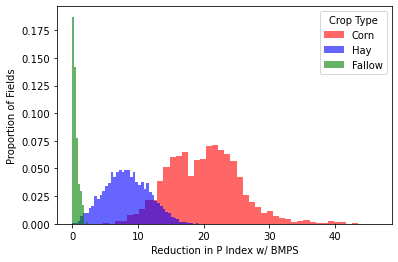

In [109]:
hist_by_crop(gdf, 'difference', 'Reduction in P Index w/ BMPS', r"C:\Users\benja\VT_P_index\model\misc_charts\change_hist.png")

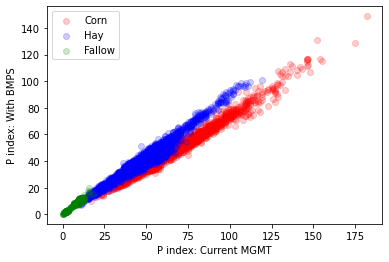

In [110]:
crops=['Corn', 'Hay', 'Fallow']
colors=['r', 'b', 'g']
for crop, color in zip(crops, colors):
    selector=gdf['crop_type']==crop
    plt.scatter(gdf[selector]['total p in'], gdf2[selector]['total p in'], alpha=.2, color=color)
    
plt.legend(crops)
plt.xlabel('P index: Current MGMT')
plt.ylabel('P index: With BMPS')
plt.savefig(r"C:\Users\benja\VT_P_index\model\misc_charts\befor_after_scatter.png")

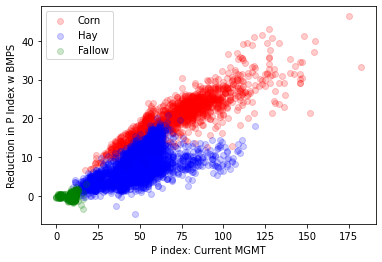

In [111]:
crops=['Corn', 'Hay', 'Fallow']
colors=['r', 'b', 'g']
for crop, color in zip(crops, colors):
    selector=gdf['crop_type']==crop
    plt.scatter(gdf[selector]['total p in'], gdf[selector]['difference'], alpha=.2, color=color)

plt.legend(crops)
plt.xlabel('P index: Current MGMT')
plt.ylabel('Reduction in P Index w BMPS')
plt.savefig(r"C:\Users\benja\VT_P_index\model\misc_charts\reduction_scatter.png")

In [112]:
his=gdf2[gdf2['total p in']>70]

In [113]:
his

,IDNUM,CROP_COVER,RKLS,slope,LS,HUC12,distance_t,elevation,soil_is_cl,hydro_grou,...,surface di,subsurface,total_erod,non_adjust,total p in,total p lo,erosion_ra,adj_p_lost,hydro_int,geometry
210,216,2111,39.919092,6.715520,0.965162,"('041504080301',)",55.863372,245.111583,1,D,...,12.670917,15.481383,5.630147,451.710767,77.612527,6.734442,6.856503,9.292556,3,"POLYGON ((433229.262 144581.779, 433245.110 14..."
535,569,2111,34.424829,5.461829,0.846443,"('041504080301',)",27.019112,285.306798,1,D,...,14.436119,15.095523,6.308844,506.352187,84.268958,7.520642,6.019663,18.690785,3,"POLYGON ((434491.660 148219.280, 434491.660 14..."
557,594,2121,21.291082,1.946886,0.438461,"('041504080301',)",13.120000,419.726815,0,C,...,26.030730,2.912308,4.524646,365.889630,71.656103,5.541118,3.028443,1.553985,2,"POLYGON ((437825.630 148347.020, 437748.190 14..."
570,607,2111,27.204823,3.898469,0.668916,"('041504080301',)",21.319022,264.609005,1,D,...,14.176167,12.525923,5.437418,436.498821,74.148489,6.500604,4.855952,8.812435,3,"POLYGON ((434361.730 148578.120, 434415.620 14..."
571,608,2121,23.512295,1.784603,0.435639,"('041504080301',)",13.120000,418.226276,0,C,...,26.260592,3.358223,5.111213,412.945235,77.062666,6.210984,3.459505,2.786028,2,"POLYGON ((437735.950 148313.956, 437727.050 14..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,9850,2111,32.470145,3.358861,0.586413,"('041504080501',)",13.120000,466.376251,0,D,...,16.670010,14.886323,7.136954,572.861208,93.635377,8.482451,4.875717,14.775582,3,"POLYGON ((455002.630 197814.120, 455017.910 19..."
9661,9862,2111,40.413676,4.820168,0.731598,"('041504080501',)",13.120000,507.223102,0,D,...,15.897253,18.512598,9.609149,770.541542,116.934728,11.296761,6.579347,19.165346,3,"POLYGON ((455209.990 197970.870, 455220.687 19..."
9663,9867,2121,23.896975,1.564285,0.429724,"('041504080501',)",42.877648,403.105824,0,D,...,33.472352,6.348022,3.616241,293.203039,74.634522,4.673681,3.337165,2.498755,3,"POLYGON ((453432.228 197961.600, 453418.550 19..."
9666,9875,2121,16.449257,1.941611,0.448328,"('041504080501',)",15.052168,414.374693,0,D,...,34.285867,5.296417,3.459683,280.832851,72.819623,4.496735,2.413961,7.218361,3,"POLYGON ((453519.908 198125.579, 453521.890 19..."


In [114]:
gdf.columns

Index(['IDNUM', 'CROP_COVER', 'RKLS', 'slope', 'LS', 'HUC12', 'distance_t',
       'elevation', 'soil_is_cl', 'hydro_grou', 'Rotation', 'K_factor',
       'county', 'crop_type', 'Years_Corn', 'Years_Hay', 'Years_Othe',
       'Years_Fall', 'acres', 'buffer_wid', 'erodedSoil', 'manure_par',
       'surface pa', 'dis_soilP', 'dis_manure', 'fertilizer', 'surface di',
       'subsurface', 'total_erod', 'non_adjust', 'total p in', 'total p lo',
       'erosion_ra', 'adj_p_lost', 'hydro_int', 'geometry', 'difference'],
      dtype='object')

In [115]:
his['hydro_grou'].value_counts()

D    305
C     18
B     12
A      3
Name: hydro_grou, dtype: int64

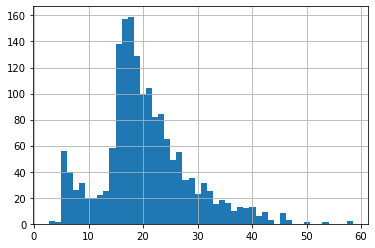

In [116]:
gdf2[gdf2['crop_type']=='Corn']['RKLS'].hist(bins=50)

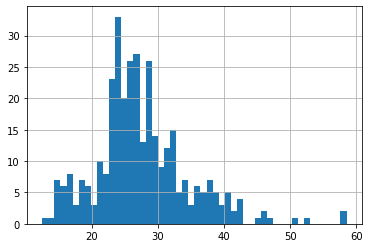

In [117]:
his["RKLS"].hist(bins=50)